# K Nearest Neighbours

# Resources Used 
For this project I will be using a k-Nearest Neighbors Jupyter notebook from Kaggle. 
- Link to the notebook: https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors

### Fix Append Error 
As of pandas 2.0, append (previously deprecated) was removed.Need to use concat instead. 
- https://stackoverflow.com/questions/75956209/error-dataframe-object-has-no-attribute-append

# Business Understanding

# Data Understanding

# Data Preperation 

# Modelling 

# Evaluation 

# Deployment 

# Changes Made To Notebook 

I started with setting up the environment with imports from the K Nearest Neighbors Notebook. 

In [1]:
# Scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
# other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Use vector drawing inside jupyter notebook
%config InlineBackend.figure_format = "svg"
# Set matplotlib default axis font size (inside this notebook)
plt.rcParams.update({'font.size': 8})

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Display the first few rows of the DataFrame
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

I had to change append to concat as of pandas 2.0, append (previously deprecated) was removed. 

In [10]:
# Compute selected stats
dfinfo = pd.DataFrame(df.dtypes, columns=["dtypes"])
for (m, n) in zip([df.count(), df.isna().sum()], ["count", "isna"]):
    dfinfo = dfinfo.merge(pd.DataFrame(m, columns=[n]), right_index=True, left_index=True, how="inner")

# Transpose dfinfo and append df.describe()
dfinfo = pd.concat([dfinfo.T, df.describe().T])

print(dfinfo)

                        mean radius mean texture mean perimeter mean area  \
dtypes                      float64      float64        float64   float64   
count                           569          569            569       569   
isna                              0            0              0         0   
mean radius                     NaN          NaN            NaN       NaN   
mean texture                    NaN          NaN            NaN       NaN   
mean perimeter                  NaN          NaN            NaN       NaN   
mean area                       NaN          NaN            NaN       NaN   
mean smoothness                 NaN          NaN            NaN       NaN   
mean compactness                NaN          NaN            NaN       NaN   
mean concavity                  NaN          NaN            NaN       NaN   
mean concave points             NaN          NaN            NaN       NaN   
mean symmetry                   NaN          NaN            NaN       NaN   

C:\Users\sarah\AppData\Local\Temp\ipykernel_27340\4182003803.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


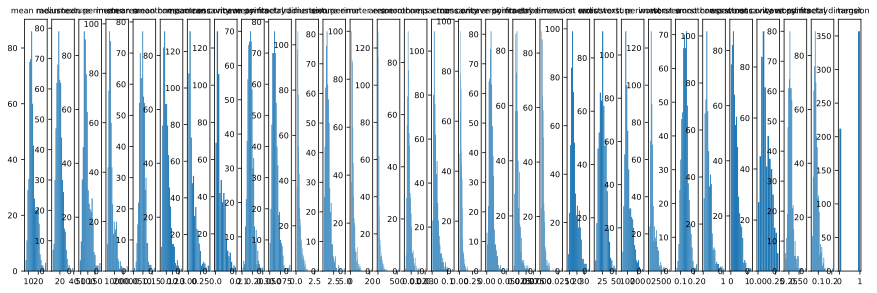

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Plot histograms for each column
plt.figure(figsize=(15, 10))
for i, v in enumerate(df.columns):
    plt.subplot(2, df.shape[1], i + 1)
    plt.hist(df.iloc[:, i], bins='auto')
    plt.title(df.columns[i], fontsize=8)

plt.tight_layout()
plt.show()


In [18]:
df.corr().round(2).style.background_gradient(cmap="viridis")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.320000,1.000000,0.990000,0.170000,0.510000,0.680000,0.820000,0.150000,-0.310000,0.680000,-0.100000,0.670000,0.740000,-0.220000,0.210000,0.190000,0.380000,-0.100000,-0.040000,0.970000,0.300000,0.970000,0.940000,0.120000,0.410000,0.530000,0.740000,0.160000,0.010000,-0.730000
mean texture,0.320000,1.000000,0.330000,0.320000,-0.020000,0.240000,0.300000,0.290000,0.070000,-0.080000,0.280000,0.390000,0.280000,0.260000,0.010000,0.190000,0.140000,0.160000,0.010000,0.050000,0.350000,0.910000,0.360000,0.340000,0.080000,0.280000,0.300000,0.300000,0.110000,0.120000,-0.420000
mean perimeter,1.000000,0.330000,1.000000,0.990000,0.210000,0.560000,0.720000,0.850000,0.180000,-0.260000,0.690000,-0.090000,0.690000,0.740000,-0.200000,0.250000,0.230000,0.410000,-0.080000,-0.010000,0.970000,0.300000,0.970000,0.940000,0.150000,0.460000,0.560000,0.770000,0.190000,0.050000,-0.740000
mean area,0.990000,0.320000,0.990000,1.000000,0.180000,0.500000,0.690000,0.820000,0.150000,-0.280000,0.730000,-0.070000,0.730000,0.800000,-0.170000,0.210000,0.210000,0.370000,-0.070000,-0.020000,0.960000,0.290000,0.960000,0.960000,0.120000,0.390000,0.510000,0.720000,0.140000,0.000000,-0.710000
mean smoothness,0.170000,-0.020000,0.210000,0.180000,1.000000,0.660000,0.520000,0.550000,0.560000,0.580000,0.300000,0.070000,0.300000,0.250000,0.330000,0.320000,0.250000,0.380000,0.200000,0.280000,0.210000,0.040000,0.240000,0.210000,0.810000,0.470000,0.430000,0.500000,0.390000,0.500000,-0.360000
mean compactness,0.510000,0.240000,0.560000,0.500000,0.660000,1.000000,0.880000,0.830000,0.600000,0.570000,0.500000,0.050000,0.550000,0.460000,0.140000,0.740000,0.570000,0.640000,0.230000,0.510000,0.540000,0.250000,0.590000,0.510000,0.570000,0.870000,0.820000,0.820000,0.510000,0.690000,-0.600000
mean concavity,0.680000,0.300000,0.720000,0.690000,0.520000,0.880000,1.000000,0.920000,0.500000,0.340000,0.630000,0.080000,0.660000,0.620000,0.100000,0.670000,0.690000,0.680000,0.180000,0.450000,0.690000,0.300000,0.730000,0.680000,0.450000,0.750000,0.880000,0.860000,0.410000,0.510000,-0.700000
mean concave points,0.820000,0.290000,0.850000,0.820000,0.550000,0.830000,0.920000,1.000000,0.460000,0.170000,0.700000,0.020000,0.710000,0.690000,0.030000,0.490000,0.440000,0.620000,0.100000,0.260000,0.830000,0.290000,0.860000,0.810000,0.450000,0.670000,0.750000,0.910000,0.380000,0.370000,-0.780000
mean symmetry,0.150000,0.070000,0.180000,0.150000,0.560000,0.600000,0.500000,0.460000,1.000000,0.480000,0.300000,0.130000,0.310000,0.220000,0.190000,0.420000,0.340000,0.390000,0.450000,0.330000,0.190000,0.090000,0.220000,0.180000,0.430000,0.470000,0.430000,0.430000,0.700000,0.440000,-0.330000
mean fractal dimension,-0.310000,-0.080000,-0.260000,-0.280000,0.580000,0.570000,0.340000,0.170000,0.480000,1.000000,0.000000,0.160000,0.040000,-0.090000,0.400000,0.560000,0.450000,0.340000,0.350000,0.690000,-0.250000,-0.050000,-0.210000,-0.230000,0.500000,0.460000,0.350000,0.180000,0.330000,0.770000,0.010000
